# Information Visualisation (SOLUTION)
## Exercise 3 - Preprocessing and data analysis using Python
In this exercise session you will learn how to preprocess a dataset using Python and how to analyse the contents of this dataset before creating visualisations.

*Assistant: Maxim Van de Wynckel - 2021*

### Dependencies
For the scope of this exercise, you will need the following three dependencies. Note that there are many packages available, ranging from domain specific packages (e.g. packages for converting currencies in a financial dataset, ...) to data gathering packages for scraping a site or API.

#### Pandas
Pandas is a data analysis and manipulation framework [More info...](https://pandas.pydata.org/)
It has the ability to load data from various data sources (JSON, CSV, Excel sheets, ...) and uses the *DataFrame* concept to encapsulate this data. Similar to other Python libraries, pandas has a preferred alias *pd*.

In [1]:
import pandas as pd

#### NumPy
NumPy is a mathematical library for multidimensional array manipulation. We can use it in combination with pandas to perform simple operations on our multidimensional datasets (rows, columns)

In [2]:
import numpy as np

#### Matplotlib
Simple (static) visualisations are a good way to analyse your data. For analysising purposes, we do not need any fancy or clean visualisations. For this - we will use matplotlib.

In [3]:
import matplotlib.pyplot as plt

### Dataset
For this exercise session we will process a dataset from our own research with Wi-Fi (WLAN), Bluetooth (BLE) and IMU data. This data is used to create a radio and geomagnetic map of an indoor enviorment, commonly used in indoor positioning algorithms.

In a dataset that you use for your project, you often expect a description of the contents of this dataset (what does the data mean?). For this dataset, we have the following information:

- For this dataset we split up a room in **45 points** (with centimeter coordinates in our dataset). 
- The room has the following dimensions: 500cm * 350cm
- For each point, we record the dataset at 60cm height.
- For each point, we perform data collection in four directions (indicated with the column ```ORIENTATION```)
- Each set of data (every direction for every point) takes aproximately 30 seconds
- We use a smartphone to collect the data
- Our mobile phone collects information about the accelerometer (ACC_), gyroscope (RRATE_), magnetometer (MAG_) and computed pitch, roll, yaw. 
- Our movile phone also collects the received signal strength (RSSI) of 4 Bluetooth beacons and all Wi-Fi access points in range (denoted using their MAC address as columns). 
- If an access point was not in range, its value was set to 100 (NOTE: 100 RSSI is invalid, its always negative)
- The Bluetooth, Wi-Fi and IMU data is recorded separately and inserted as individual rows.
- The Bluetooth beacons have the following coordinates (x, y, z):
    - Beacon 1: (0, 0, 150)
    - Beacon 2: (450, 0, 150)
    - Beacon 3: (250, 316, 150)
    - Beacon 4: (0, 316, 150)
    
*You may, or may not need all this data - for your project, think about why certain information is given*

Load the dataset located in ```data/2020-04-11_openhps_fingerprints.csv```. Check this page to see how you can load data [https://pandas.pydata.org/docs/reference/io.html](https://pandas.pydata.org/docs/reference/io.html). Place this dataset in a variable called *df*.

In [4]:
df = pd.read_csv("data/2020-04-11_openhps_fingerprints.csv")

### Initial analysis
For our analysis, we want to make sure that information given in the description is correct. We perform an initial analysis first and a more elaborate analysis once we have cleaned up our data.

Get a quick overview of the dataset by showing the first 10 rows [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [5]:
df.head(10)

,TIMESTAMP,X,Y,Z,MAG_X,MAG_Y,MAG_Z,ACC_X,ACC_Y,ACC_Z,...,X38.35.FB.08.5B.3C,X0E.96.E6.A2.F4.73,X34.2C.C4.AE.B5.20,X36.2C.B4.8D.01.63,E2.37.BF.0F.0F.6E,X40.65.A3.40.B8.56,X34.2C.C4.8D.01.63,DC.53.7C.53.AD.18,DA.0B.9A.EE.B0.2A,ORIENTATION
0,1586606506997,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
1,1586606507430,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
2,1586606507630,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
3,1586608299364,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
4,1586608299566,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
5,1586608299770,50,50,60,-10.507252,-4.146547,-27.784737,0.076156,-0.162224,9.876857,...,100.0,100,100,100,100.0,100,100.0,100,100,1
6,1586608299972,50,50,60,-10.507252,-4.146547,-27.784737,0.076156,-0.162224,9.876857,...,100.0,100,100,100,100.0,100,100.0,100,100,1
7,1586608300378,50,50,60,-10.507252,-4.146547,-27.784737,0.076156,-0.162224,9.876857,...,100.0,100,100,100,100.0,100,100.0,100,100,1
8,1586608300578,50,50,60,-10.507252,-4.146547,-27.784737,0.076156,-0.162224,9.876857,...,100.0,100,100,100,100.0,100,100.0,100,100,1
9,1586608300779,50,50,60,-11.036743,-4.091186,-28.127495,0.074959,-0.177786,9.880449,...,100.0,100,100,100,100.0,100,100.0,100,100,1


In [6]:
df.count()

TIMESTAMP             33248
X                     33248
Y                     33248
Z                     33248
MAG_X                 33248
                      ...  
X40.65.A3.40.B8.56    33248
X34.2C.C4.8D.01.63    33248
DC.53.7C.53.AD.18     33248
DA.0B.9A.EE.B0.2A     33248
ORIENTATION           33248
Length: 87, dtype: int64

We now see that we have 87 columns and 33439 rows, but not all columns and rows are visible, get a list of all 86 columns in our dataset using the loaded dataframe. The result does not have to be formatted, we just want to get an idea of all 86 columns [https://pandas.pydata.org/docs/reference/frame.html](https://pandas.pydata.org/docs/reference/frame.html). 

In [7]:
df.columns

Index(['TIMESTAMP', 'X', 'Y', 'Z', 'MAG_X', 'MAG_Y', 'MAG_Z', 'ACC_X', 'ACC_Y',
       'ACC_Z', 'RRATE_X', 'RRATE_Y', 'RRATE_Z', 'ROTATION_AZIMUTH',
       'ROTATION_PITCH', 'ROTATION_ROLL', 'BEACON_3', 'X38.35.FB.1A.45.72',
       'DE.FD.AD.EE.CA.A0', 'DC.A4.CA.EE.AD.FD', 'X00.37.B7.6D.84.F6',
       'F8.08.4F.04.6B.55', 'B0.7F.B9.36.77.1F', 'X36.2C.C4.C7.13.47',
       'DC.53.7C.9E.47.BA', 'X34.2C.C4.AE.20.04', 'F8.08.4F.04.6B.54',
       'DC.53.7C.71.A8.4C', 'X00.78.9E.6C.02.7E', 'X1C.B0.44.3C.16.74',
       'X1E.B0.44.3C.16.75', 'X06.53.7C.5F.A2.C1', 'B8.D9.4D.D9.06.26',
       'X5C.35.3B.68.84.41', 'X90.4D.4A.D6.00.76', 'X40.F2.01.86.F5.52',
       'X42.F2.01.86.F5.53', 'X36.2C.C4.B8.60.B4', 'X06.35.3B.68.84.44',
       'X34.2C.C4.C7.14.44', 'X34.2C.C4.B8.61.B8', 'X34.2C.C4.C7.14.52',
       'X86.BA.3B.80.21.8E', 'X36.36.3B.BC.C8.E6', 'C8.D1.2A.F5.BD.F4',
       'B8.D9.4D.D9.06.27', 'X36.2C.B4.B8.61.B8', 'X38.35.FB.1B.73.BB',
       'X06.53.7C.5F.A2.C2', 'X38.43.7D.8D.31.FD', 'X3A

#### Data points
Verify that the dataset has indeed 45 unique data points.

In [8]:
df[['X', 'Y', 'Z']].drop_duplicates().shape

(45, 3)

In [9]:
df[['X', 'Y', 'Z']].drop_duplicates().head(5)

,X,Y,Z
0,50,50,60
849,100,50,60
1562,150,50,60
2261,200,50,60
2964,250,50,60


Plot the 45 data points in a simple plot, to get a generic idea of the room where the data was recorded.
Use the plot command (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with attribute ```kind='scatter'``` and the correct x and y attributes.

<AxesSubplot:title={'center':'Data points'}, xlabel='X', ylabel='Y'>

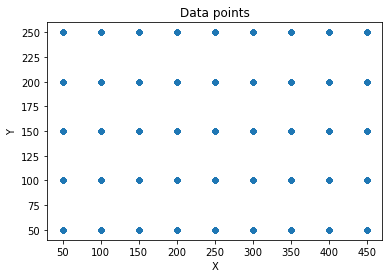

In [10]:
df.plot(kind='scatter', x='X', y='Y', title="Data points")

Verify that we have four orientations without 'about the same' amount of data points.

In [11]:
df['ORIENTATION'].drop_duplicates()

0      1
275    2
468    3
651    4
Name: ORIENTATION, dtype: int64

<AxesSubplot:ylabel='Frequency'>

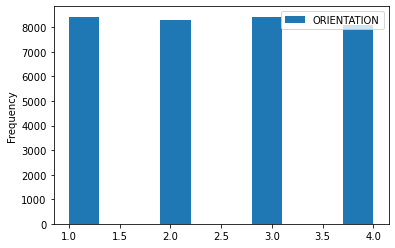

In [12]:
df.plot(kind='hist', y='ORIENTATION')

The histogram shows that we have four orientations with similar amount of samples. However, there is one point in the dataset that is missing information. Find the X,Y,Z coordinate that is missing 'a' certain orientation sample.

In [13]:
df.groupby(['X', 'Y', 'Z','ORIENTATION'],as_index=False).mean().groupby(['X', 'Y', 'Z']).sum()

ORIENTATION     TIMESTAMP       MAG_X       MAG_Y       MAG_Z  \
X   Y   Z                                                                   
50  50  60           10  6.346434e+12  182.175540  188.511337  134.404764   
    100 60           10  6.346440e+12  206.066111  205.092678  154.363936   
    150 60           10  6.346450e+12  229.128431  213.997251  174.758049   
    200 60           10  6.346457e+12  190.302202  186.384915  126.119495   
    250 60           10  6.346464e+12  211.816221  198.377278  131.804925   
100 50  60           10  6.346434e+12  205.863908  211.132406  147.965749   
    100 60           10  6.346441e+12  201.646044  200.873406  145.203830   
    150 60           10  6.346451e+12  220.422074  212.716840  168.030444   
    200 60           10  6.346458e+12  209.220803  204.262940  148.383779   
    250 60           10  6.346464e+12  217.766259  208.872937  145.178715   
150 50  60           10  6.346435e+12  219.767682  218.373185  164.138912   
    100 60           10  6.346441e+12  208.973347  203.962143  152.151761   
    150 60           10  6.346452e+12  199.155618  183.284819  143.996069   
    200 60           10  6.346459e+12  184.662275  177.673782  111.403367   
    250 60           10  6.346465e+12  220.339562  210.924508  151.138631   
200 50  60           10  6.346436e+12  216.096091  208.915182  146.929489   
    100 60           10  6.346442e+12  203.084725  192.112302  142.469305   
    150 60           10  6.346452e+12  218.645570  186.075786  172.030837   
    200 60           10  6.346459e+12  224.972136  219.754982  165.797951   
    250 60           10  6.346466e+12  225.124694  214.939779  156.938401   
250 50  60           10  6.346436e+12  199.883716  195.324658  131.534493   
    100 60           10  6.346443e+12  222.071835  212.368755  158.776152   
    150 60           10  6.346453e+12  203.221239  189.812392  145.792285   
    200 60           10  6.346460e+12  214.733187  207.546112  148.463256   
    250 60           10  6.346466e+12  207.331362  196.935386  133.205291   
300 50  60           10  6.346437e+12  211.705780  209.500682  143.080410   
    100 60           10  6.346444e+12  204.133460  201.037389  138.195404   
    150 60           10  6.346454e+12  213.598508  205.096672  153.810814   
    200 60           10  6.346461e+12  220.525129  211.981134  151.036862   
    250 60           10  6.346468e+12  221.188624  208.294166  151.785692   
350 50  60           10  6.346438e+12  197.078070  196.562410  124.639159   
    100 60           10  6.346448e+12  183.422042  182.387244  119.269262   
    150 60           10  6.346455e+12  193.655718  186.788499  123.977606   
    200 60            6  4.759846e+12  145.567567  150.610099   93.974697   
    250 60           10  6.346468e+12  215.847793  207.514173  148.077845   
400 50  60           10  6.346439e+12  202.757551  200.271175  134.134806   
    100 60           10  6.346449e+12  206.055566  209.072717  148.402276   
    150 60           10  6.346455e+12  213.495297  208.978135  150.022694   
    200 60           10  6.346462e+12  208.120709  203.485760  139.102721   
    250 60           10  6.346469e+12  213.051016  205.585267  141.142551   
450 50  60           10  6.346439e+12  220.581300  217.584305  156.368049   
    100 60           10  6.346449e+12  214.978551  215.964554  152.505156   
    150 60           10  6.346456e+12  225.417158  215.581981  153.032524   
    200 60           10  6.346463e+12  222.981690  212.010946  149.725337   
    250 60           10  6.346470e+12  197.473395  203.833584  136.770001   

                 ACC_X       ACC_Y       ACC_Z     RRATE_X     RRATE_Y  ...  \
X   Y   Z                                                               ...   
50  50  60  195.179121  194.760748  215.358182  195.135356  195.021749  ...   
    100 60  212.724236  212.406303  230.820092  212.495572  212.500311  ...   
    150 60  230.539111  230.424008  247.051513  230.499424  230.493859  ... 

#### Column type
Pandas does a good job detecting the type of value in a column. However, we should verify this. Incorrect types can cause issues when performing mathemtical operations.

In [14]:
df.dtypes

TIMESTAMP               int64
X                       int64
Y                       int64
Z                       int64
MAG_X                 float64
                       ...   
X40.65.A3.40.B8.56      int64
X34.2C.C4.8D.01.63    float64
DC.53.7C.53.AD.18       int64
DA.0B.9A.EE.B0.2A       int64
ORIENTATION             int64
Length: 87, dtype: object

We have now performed a first analysis of our dataset:
- We can see that we have 334639 rows, each at a different **timestamp**. 
- We also see that we have multiple rows for the same XYZ coordinate, but at this stage we have not analysed how many different XYZ coordinates there are. 
- Many of our columns are MAC addresses
- Columns MAG_X,Y,Z is magnetometer data
- Columns ACC_X,Y,Z is accelerometer data
- Columns RRATE_X,Y,Z is rotation rate (gyroscope)
- Columns ROTATION_PITCH, ROLL and AZIMUTH shows the pitch roll and yaw (azimuth)
- Finally, we have 4 BEACON columns

### Goal
The goal is to clean up and process this dataset. We want the following results:

- We want seperate files for ```wlan_data```, ```imu_data``` and ```ble_data```
- We want column names to anonymous (no MAC addresses). This is important if we want to distribute the data.
- Drop unneeded columns such as the Z coordinate
- Instead of a raw ROTATION_AZIMUTH, we want a clear identifier for the orientation (1, 2, 3, 4)
- We want our results merged (average) for each data point and orientation (4 different orientations)

### Preprocessing
For our preprocessing we will manipulate the dataset in order to prepare it four our visualisations.

#### Column renaming
The MAC addresses as column names make the dataset a bit unreadable. Our first step is to anonymise these columns to generic names such as WAP_1, WAP_2 (similar to the BEACON columns)

In [15]:
# Create a dictionary of all columns we have to rename
renaming = {}
i = 1
for col in df.columns:
    # Assume its a MAC address if its 17 characters or more
    if (len(col) >= 17):
        renaming[col] = "WAP_" + str(i)
        i += 1

# Lets confirm its correct
print(renaming)

{'X38.35.FB.1A.45.72': 'WAP_1', 'DE.FD.AD.EE.CA.A0': 'WAP_2', 'DC.A4.CA.EE.AD.FD': 'WAP_3', 'X00.37.B7.6D.84.F6': 'WAP_4', 'F8.08.4F.04.6B.55': 'WAP_5', 'B0.7F.B9.36.77.1F': 'WAP_6', 'X36.2C.C4.C7.13.47': 'WAP_7', 'DC.53.7C.9E.47.BA': 'WAP_8', 'X34.2C.C4.AE.20.04': 'WAP_9', 'F8.08.4F.04.6B.54': 'WAP_10', 'DC.53.7C.71.A8.4C': 'WAP_11', 'X00.78.9E.6C.02.7E': 'WAP_12', 'X1C.B0.44.3C.16.74': 'WAP_13', 'X1E.B0.44.3C.16.75': 'WAP_14', 'X06.53.7C.5F.A2.C1': 'WAP_15', 'B8.D9.4D.D9.06.26': 'WAP_16', 'X5C.35.3B.68.84.41': 'WAP_17', 'X90.4D.4A.D6.00.76': 'WAP_18', 'X40.F2.01.86.F5.52': 'WAP_19', 'X42.F2.01.86.F5.53': 'WAP_20', 'X36.2C.C4.B8.60.B4': 'WAP_21', 'X06.35.3B.68.84.44': 'WAP_22', 'X34.2C.C4.C7.14.44': 'WAP_23', 'X34.2C.C4.B8.61.B8': 'WAP_24', 'X34.2C.C4.C7.14.52': 'WAP_25', 'X86.BA.3B.80.21.8E': 'WAP_26', 'X36.36.3B.BC.C8.E6': 'WAP_27', 'C8.D1.2A.F5.BD.F4': 'WAP_28', 'B8.D9.4D.D9.06.27': 'WAP_29', 'X36.2C.B4.B8.61.B8': 'WAP_30', 'X38.35.FB.1B.73.BB': 'WAP_31', 'X06.53.7C.5F.A2.C2': 'WAP

Use the ```renaming``` dictionary to rename the columns [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html). Now we also know that we have 66 different Wi-Fi access points in this dataset.

In [16]:
df = df.rename(columns = renaming)

In [17]:
df

,TIMESTAMP,X,Y,Z,MAG_X,MAG_Y,MAG_Z,ACC_X,ACC_Y,ACC_Z,...,WAP_58,WAP_59,WAP_60,WAP_61,WAP_62,WAP_63,WAP_64,WAP_65,WAP_66,ORIENTATION
0,1586606506997,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
1,1586606507430,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
2,1586606507630,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
3,1586608299364,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
4,1586608299566,50,50,60,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,...,100.0,100,100,100,100.0,100,100.0,100,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33243,1586617509881,450,250,60,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74,4
33244,1586617509922,450,250,60,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74,4
33245,1586617509963,450,250,60,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74,4
33246,1586617510010,450,250,60,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74,4


#### Splitting our dataset
From our description: *The Bluetooth, Wi-Fi and IMU data is recorded separately and inserted as individual rows.* we know that the IMU, Bluetooth and Wi-Fi data is not merged on the same row. We will split our data frame.

In [18]:
# Subset the IMU data
imu_data = df[df['MAG_X'] != 100]
# Drop unneeded columns
imu_columns = [
    'TIMESTAMP', 
    'X', 
    'Y', 
    'ORIENTATION',
    'MAG_X', 
    'MAG_Y', 
    'MAG_Z', 
    'ACC_X', 
    'ACC_Y', 
    'ACC_Z', 
    'RRATE_X', 
    'RRATE_Y', 
    'RRATE_Z',
    'ROTATION_PITCH',
    'ROTATION_ROLL',
    'ROTATION_AZIMUTH'
]
imu_data = imu_data[imu_columns]

In [19]:
imu_data

,TIMESTAMP,X,Y,ORIENTATION,MAG_X,MAG_Y,MAG_Z,ACC_X,ACC_Y,ACC_Z,RRATE_X,RRATE_Y,RRATE_Z,ROTATION_PITCH,ROTATION_ROLL,ROTATION_AZIMUTH
0,1586606506997,50,50,1,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,0.027643,-0.081414,-0.000141,1.453002,359.899536,112.866982
1,1586606507430,50,50,1,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,0.027643,-0.081414,-0.000141,1.453002,359.899536,112.866982
2,1586606507630,50,50,1,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,0.027643,-0.081414,-0.000141,1.453002,359.899536,112.866982
3,1586608299364,50,50,1,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,0.027643,-0.081414,-0.000141,1.453002,359.899536,112.866982
4,1586608299566,50,50,1,-11.112595,-3.951366,-28.203293,0.017501,-0.253200,9.982198,0.027643,-0.081414,-0.000141,1.453002,359.899536,112.866982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33230,1586617508035,450,250,4,-12.105991,2.223503,-39.515877,0.121644,-0.103569,9.760744,-0.002595,-0.000898,0.000389,0.875215,359.531860,82.723104
33232,1586617508844,450,250,4,-12.105991,2.223503,-39.515877,0.121644,-0.103569,9.760744,-0.002595,-0.000898,0.000389,0.875215,359.531860,82.723104
33233,1586617509047,450,250,4,-12.861099,2.345892,-39.944435,0.139600,-0.104766,9.761941,-0.000762,-0.000287,0.001000,0.987513,359.461655,84.106518
33234,1586617509448,450,250,4,-12.861099,2.345892,-39.944435,0.139600,-0.104766,9.761941,-0.000762,-0.000287,0.001000,0.987513,359.461655,84.106518


Do the same thing for ```ble_data``` and ```wlan_data```. Bluetooth data is data where **at least one** of the BEACON_* cells is not empty. Wi-Fi data is the remaining data.

In [20]:
# Subset the BLE data
ble_data = df[
    (df['BEACON_1'] != 100) &
    (df['BEACON_2'] != 100) &
    (df['BEACON_3'] != 100) & 
    (df['BEACON_4'] != 100)
]
# Drop unneeded columns
ble_columns = [
    'TIMESTAMP', 
    'X', 
    'Y',
    'ORIENTATION',
    'BEACON_1', 
    'BEACON_2', 
    'BEACON_3', 
    'BEACON_4'
]
ble_data = ble_data[ble_columns]

In [21]:
ble_data

,TIMESTAMP,X,Y,ORIENTATION,BEACON_1,BEACON_2,BEACON_3,BEACON_4
1,1586606507430,50,50,1,-69.0,-87.0,-69.0,-81.0
852,1586608469737,100,50,1,-65.0,-78.0,-63.0,-72.0
1564,1586608655044,150,50,1,-70.0,-80.0,-83.0,-87.0
2261,1586608833650,200,50,1,-76.0,-76.0,-73.0,-75.0
2965,1586608999752,250,50,1,-78.0,-78.0,-69.0,-74.0
3751,1586609160128,300,50,1,-72.0,-70.0,-63.0,-68.0
4549,1586609400051,350,50,1,-74.0,-68.0,-60.0,-79.0
5313,1586609566023,400,50,1,-91.0,-68.0,-66.0,-79.0
6009,1586609725992,450,50,1,-78.0,-69.0,-73.0,-80.0
6782,1586609943849,50,100,1,-68.0,-80.0,-69.0,-83.0


In [22]:
# Subset the WLAN data
wlan_data = df[
    (df['BEACON_1'] == 100) &
    (df['BEACON_2'] == 100) &
    (df['BEACON_3'] == 100) &
    (df['BEACON_4'] == 100)
]
# Drop unneeded columns
wlan_columns = [
    'TIMESTAMP', 
    'X', 
    'Y',
    'ORIENTATION',
] + list(renaming.values())
wlan_data = wlan_data[wlan_columns]

In [23]:
wlan_data

,TIMESTAMP,X,Y,ORIENTATION,WAP_1,WAP_2,WAP_3,WAP_4,WAP_5,WAP_6,...,WAP_57,WAP_58,WAP_59,WAP_60,WAP_61,WAP_62,WAP_63,WAP_64,WAP_65,WAP_66
0,1586606506997,50,50,1,100,100.0,100.0,100,100.0,100,...,100,100.0,100,100,100,100.0,100,100.0,100,100
2,1586606507630,50,50,1,100,100.0,100.0,100,100.0,100,...,100,100.0,100,100,100,100.0,100,100.0,100,100
3,1586608299364,50,50,1,100,100.0,100.0,100,100.0,100,...,100,100.0,100,100,100,100.0,100,100.0,100,100
4,1586608299566,50,50,1,100,100.0,100.0,100,100.0,100,...,100,100.0,100,100,100,100.0,100,100.0,100,100
5,1586608299770,50,50,1,100,100.0,100.0,100,100.0,100,...,100,100.0,100,100,100,100.0,100,100.0,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33243,1586617509881,450,250,4,-87,-89.0,-90.0,-85,-90.0,-87,...,-85,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74
33244,1586617509922,450,250,4,-87,-89.0,-90.0,-85,-90.0,-87,...,-85,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74
33245,1586617509963,450,250,4,-87,-89.0,-90.0,-85,-90.0,-87,...,-85,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74
33246,1586617510010,450,250,4,-87,-89.0,-90.0,-85,-90.0,-87,...,-85,-85.0,-78,-87,-86,-48.0,-82,-87.0,-87,-74


#### Merge data
Merge the rows of the IMU, BLE and Wi-Fi data for each point and orientation. During the creation of the dataset, we accidentally did not account for the inaccuracies

In [24]:
wlan_data = wlan_data.groupby(['X', 'Y', 'ORIENTATION']).agg(np.mean)

In [25]:
imu_data = imu_data.groupby(['X', 'Y', 'ORIENTATION']).agg(np.mean)

In [26]:
ble_data = ble_data.groupby(['X', 'Y', 'ORIENTATION']).agg(np.mean)

In [27]:
wlan_data.shape

(179, 67)

We have 179 rows as a result (45 data points * 4 orientations - 1 missing sample) 

## Output
Save the data frames to processed csv files, ready for the visualisation. Use ```to_csv``` on a dataframe.
Save the files to ```2020-04-11_openhps_imu_data.csv```, ```2020-04-11_openhps_ble_data.csv``` and ```2020-04-11_openhps_wlan_data.csv```. Make sure that the index column is not shown (first column should be timestamp).

In [28]:
imu_data.to_csv("2020-04-11_openhps_imu_data.csv", index=False)

In [29]:
ble_data.to_csv("2020-04-11_openhps_ble_data.csv", index=False)

In [30]:
wlan_data.to_csv("2020-04-11_openhps_wlan_data.csv", index=False)